# <a name="0">Alpha Group Product Campain Model</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data Exploration</a>
3. <a href="#3">Data Analysis</a>
4. <a href="#4">Select features to build the model</a>
5. <a href="#5">Training and test datasets</a>
6. <a href="#6">Train and tune a classifierr</a>



## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

The attributes are:

- `country`: Country name
- `article`: 6 digit article number, as unique identifier of an article
- `sales`: total number of units sold in respective retail week
- `regular_price`: recommended retail price of the article
- `current_price`: current selling price (weighted average over the week
- `ratio`: price ratio as current_price/regular_price, such that price discount is 1-ratio
- `promo1`: indicator for media advertisement, taking 1 in weeks of activation and 0 otherwise
- `promo2`: indicator for store events, taking 1 in weeks with events and 0 otherwise
- `customer_id`: customer unique identifier, one id per customer
- `promo1`: indicator for media advertisement, taking 1 in weeks of activation and 0 otherwise
- `promo2`: indicator for store events, taking 1 in weeks with events and 0 otherwise
- `customer_id`: customer unique identifier, one id per customer
- `article`: 6 digit article number, as unique identifier of an article
- `productgroup`: product group the article belongs to
- `category`:product category the article belongs to
- `cost`: total costs of the article (assumed to be fixed over time)
- `style`: description of article design
- `sizes`: size range in which article is available
- `gender`: gender of target consumer of the article
- `rgb_*_main_color`: intensity of the red (r), green (g), and blue (b) primaries of the article‘s  main color, 		      taking values [0,250]
- `rgb_*_sec_color`: intensity of the red (r), green (g), and blue (b) primaries of the article‘s secondary color, taking      values [0,250]
- `label`: advertisement result after offering/sending/presenting the offer to the customer. 0 means the customer did not      buy and 1 means the costomer did buy.

Let's read the dataset into a dataframe, using Pandas.


In [1]:
# For data wrangling 
import numpy as np
import pandas as pd
import time
import json
import warnings
from tqdm import tqdm
warnings.filterwarnings("ignore")

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('full_gen_data.csv')
df.head(50)

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,article.1,productgroup,category,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,OC6355,SHOES,TRAINING,13.29,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,AP5568,SHORTS,TRAINING,2.29,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,CB8861,HARDWARE ACCESSORIES,GOLF,1.70,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,LI3529,SHOES,RUNNING,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,GG8661,SHOES,RELAX CASUAL,9.60,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0
5,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,TX1463,SWEATSHIRTS,TRAINING,4.20,wide,"xxs,xs,s,m,l,xl,xxl",women,79,148,205,164,211,238,1
6,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,PC6383,SHOES,FOOTBALL GENERIC,9.90,wide,"xs,s,m,l,xl",unisex,139,26,26,205,155,155,0
7,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,VT7698,SHOES,INDOOR,5.20,wide,"xxs,xs,s,m,l,xl,xxl",women,135,206,250,205,155,155,1
8,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,FG2965,HARDWARE ACCESSORIES,RUNNING,1.29,slim,"xxs,xs,s,m,l,xl,xxl",women,181,181,181,205,155,155,0
9,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,AC7347,SHOES,FOOTBALL GENERIC,8.70,regular,"xxs,xs,s,m,l,xl,xxl",men,139,137,137,205,155,155,1


In [3]:
print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (100000, 24)


## 2. <a name="2">Data Exploration</a>
(<a href="#0">Go to top</a>)

We look at number of rows, columns and some simple statistics of the dataset.

In [4]:
df.describe()

,sales,regular_price,current_price,ratio,promo1,promo2,customer_id,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,56.781800,52.391200,28.290800,0.545646,0.061900,0.004900,2721.726500,6.517000,161.400000,139.600000,133.500000,207.700000,181.400000,209.900000,0.13928
std,87.934743,35.272128,22.578343,0.194363,0.240975,0.069829,1908.085499,3.914728,39.790147,63.641814,81.148727,35.313205,23.474359,45.306849,0.34624
min,1.000000,3.950000,1.950000,0.296482,0.000000,0.000000,1.000000,1.290000,79.000000,26.000000,0.000000,164.000000,155.000000,155.000000,0.00000
25%,10.000000,25.950000,11.950000,0.354839,0.000000,0.000000,1017.000000,2.290000,138.000000,104.000000,57.000000,164.000000,155.000000,155.000000,0.00000
50%,26.000000,40.950000,20.950000,0.525044,0.000000,0.000000,2091.000000,6.950000,160.000000,144.000000,143.000000,205.000000,187.000000,238.000000,0.00000
75%,64.000000,79.950000,37.950000,0.699248,0.000000,0.000000,4570.250000,9.600000,205.000000,181.000000,205.000000,255.000000,211.000000,255.000000,0.00000
max,898.000000,197.950000,195.950000,1.000000,1.000000,1.000000,5999.000000,13.290000,205.000000,238.000000,250.000000,255.000000,211.000000,255.000000,1.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
country           100000 non-null object
article           100000 non-null object
sales             100000 non-null int64
regular_price     100000 non-null float64
current_price     100000 non-null float64
ratio             100000 non-null float64
retailweek        100000 non-null object
promo1            100000 non-null int64
promo2            100000 non-null int64
customer_id       100000 non-null float64
article.1         100000 non-null object
productgroup      100000 non-null object
category          100000 non-null object
cost              100000 non-null float64
style             100000 non-null object
sizes             100000 non-null object
gender            100000 non-null object
rgb_r_main_col    100000 non-null int64
rgb_g_main_col    100000 non-null int64
rgb_b_main_col    100000 non-null int64
rgb_r_sec_col     100000 non-null int64
rgb_g_sec_col     100000 non-nu

In [60]:
df['gender'].value_counts()

women     70000
unisex    10000
kids      10000
men       10000
Name: gender, dtype: int64

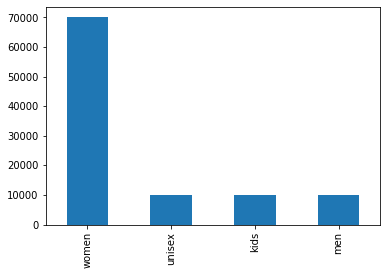

In [6]:
df['gender'].value_counts().plot(kind='bar')

In [64]:
df['country'].value_counts()

Germany    49400
Austria    35140
France     15460
Name: country, dtype: int64

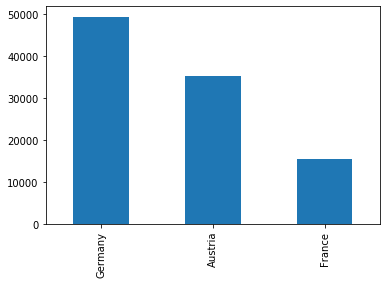

In [7]:
df['country'].value_counts().plot(kind='bar')

In [63]:
df['category'].value_counts()

TRAINING            30000
RUNNING             20000
FOOTBALL GENERIC    20000
INDOOR              10000
RELAX CASUAL        10000
GOLF                10000
Name: category, dtype: int64

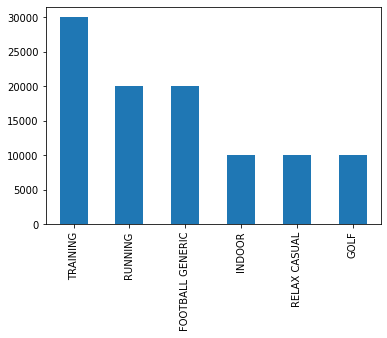

In [8]:
df['category'].value_counts().plot(kind='bar')

In [61]:
df['productgroup'].value_counts()

SHOES                   60000
HARDWARE ACCESSORIES    20000
SWEATSHIRTS             10000
SHORTS                  10000
Name: productgroup, dtype: int64

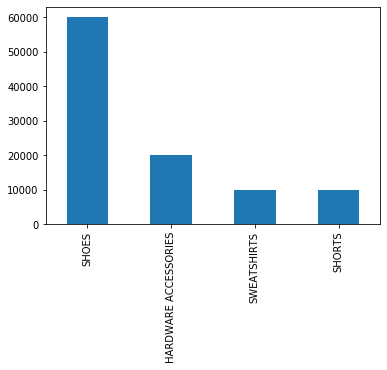

In [9]:
df['productgroup'].value_counts().plot(kind='bar')

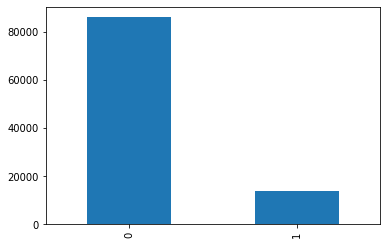

In [10]:
df['label'].value_counts().plot(kind='bar')

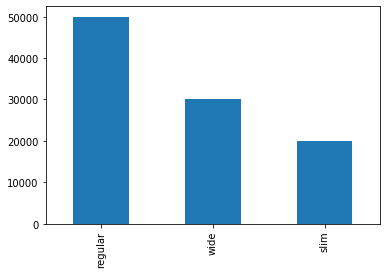

In [12]:
df['style'].value_counts().plot(kind='bar')

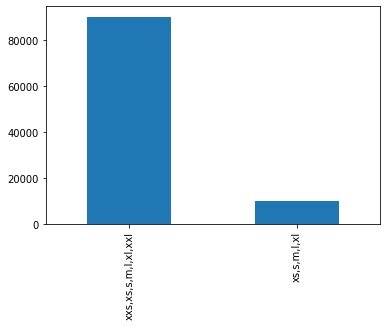

In [13]:
df['sizes'].value_counts().plot(kind='bar')

In [14]:
df['customer_id'].nunique()

4549

## 3. <a name="3">Data Analysis</a>
(<a href="#0">Go to top</a>)

We build a model using selected features (except __ID, Name, Links__). That is, we build a regressor including __numerical, and categorical__  features. 

#### Detecting outliers

Text(0.5, 1.0, 'sales')

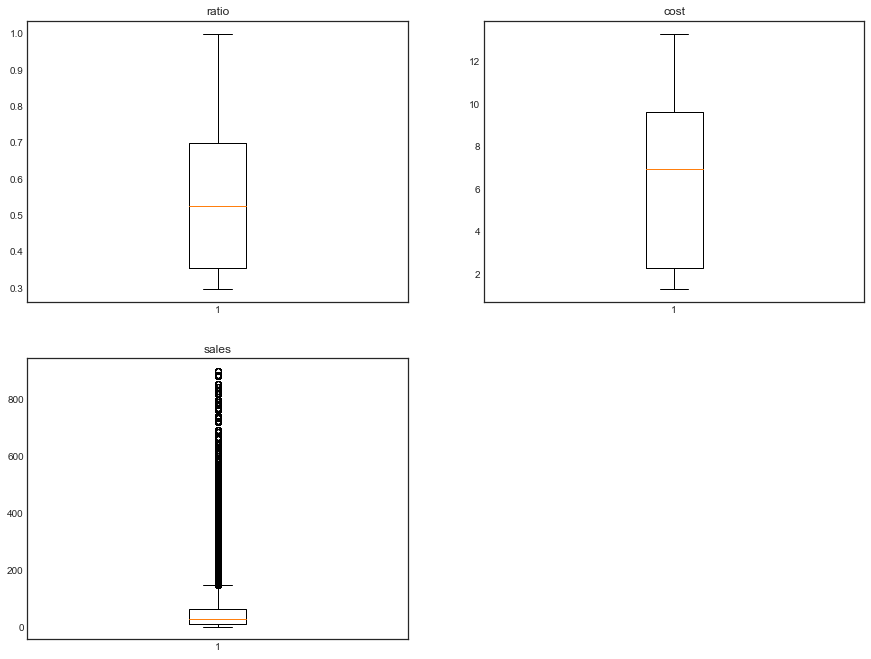

In [15]:
plt.figure(figsize = (15, 30))
plt.style.use('seaborn-white')
ax=plt.subplot(521)
plt.boxplot(df['ratio'])
ax.set_title('ratio')
ax=plt.subplot(522)
plt.boxplot(df['cost'])
ax.set_title('cost')
ax=plt.subplot(523)
plt.boxplot(df['sales'])
ax.set_title('sales')

#### Visualization

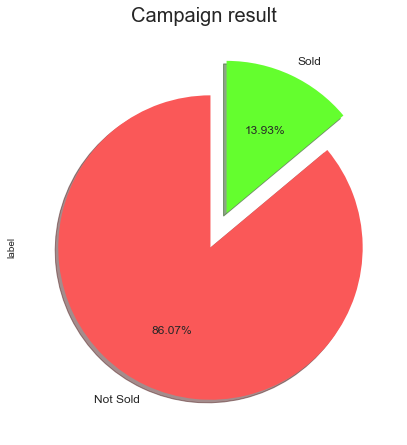

In [16]:
colors = ["#FA5858", "#64FE2E"]
labels ="Not Sold", "Sold"
plt.suptitle('Campaign result', fontsize=20)
df["label"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors, 
                                            labels=labels, fontsize=12, startangle=90 , figsize=(7,7))
palette = ["#64FE2E", "#FA5858"]
plt.show()

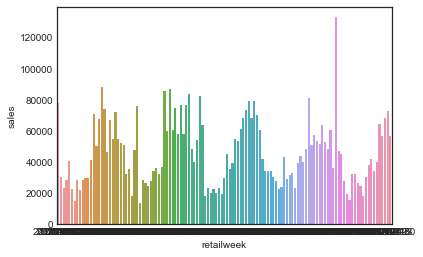

In [17]:
df_2 = df.groupby('retailweek').sum()
df_2.reset_index(inplace=True)
sns.barplot(x='retailweek', y='sales', data=df_2);

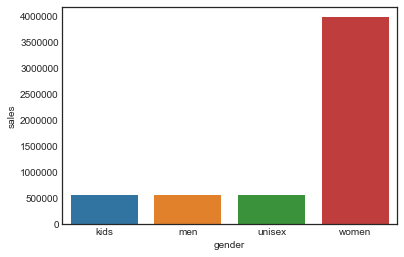

In [65]:
df_3 = df.groupby('gender').sum()
df_3.reset_index(inplace=True)
sns.barplot(x='gender', y='sales', data=df_3);

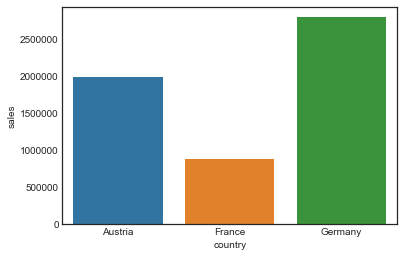

In [67]:
df_3 = df.groupby('country').sum()
df_3.reset_index(inplace=True)
sns.barplot(x='country', y='sales', data=df_3)

In [68]:
def plot_bar(column):
    temp_1 = pd.DataFrame()
    # count categorical values
    temp_1['Sold'] = df[df['label'] == 1][column].value_counts()
    temp_1['Not Sold'] = df[df['label'] == 0][column].value_counts()
    temp_1.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of customers')
    plt.title('Distribution of {} and campaign result'.format(column))
    plt.show();

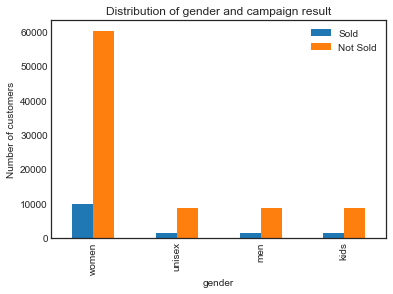

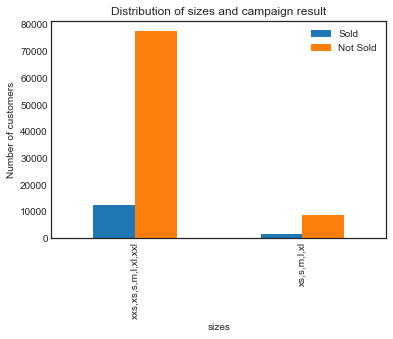

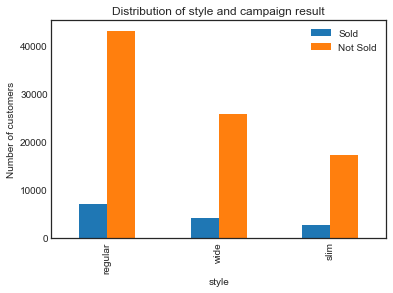

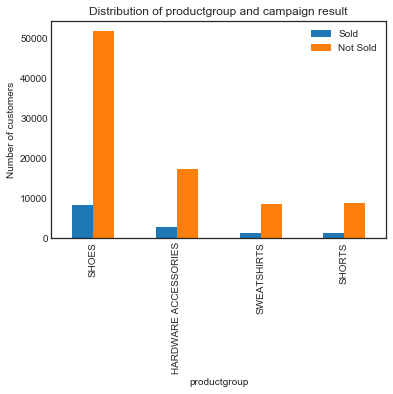

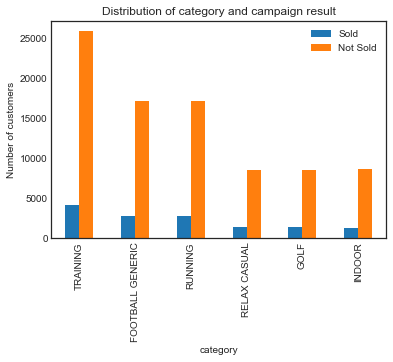

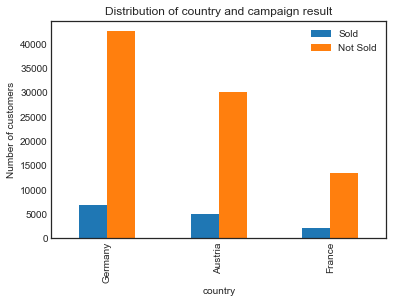

(None, None, None, None, None, None)

In [69]:
plot_bar('gender'), plot_bar('sizes'), plot_bar('style'), plot_bar('productgroup'), plot_bar('category'),plot_bar('country')

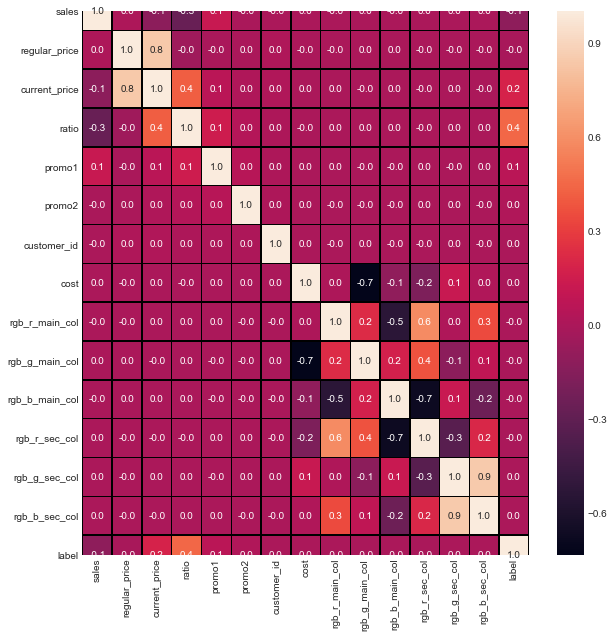

In [20]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

## 4. <a name="3">Select features to build the model</a>
(<a href="#0">Go to top</a>)

We build a model using selected features (except __ID, Name, Links__). That is, we build a regressor including __numerical, and categorical__  features. 

##### converting the two promo columns to str to be categorical feature

In [22]:
numeric_features = ['sales','ratio','cost']

date_features = ['retailweek']

text_categorical_features =  ['productgroup','category','style','sizes','gender','country']

numeric_categorical_features =  ['promo1','promo2']

non_useful_features = ['article', 'customer_id', 'article', 'rgb_r_main_col', 'rgb_g_main_col', 
                       'rgb_b_main_col Logo','rgb_r_sec_col','rgb_g_sec_col','rgb_b_sec_col']

label_feature = ['label']

In [21]:
df['promo1'] = df['promo1'].astype('str')
df['promo2'] = df['promo2'].astype('str')

In [23]:
features = numeric_features + text_categorical_features + numeric_categorical_features

In [24]:
df_model=df[features+label_feature]
df_model.head()

,sales,ratio,cost,productgroup,category,style,sizes,gender,country,promo1,promo2,label
0,28,0.663866,13.29,SHOES,TRAINING,slim,"xxs,xs,s,m,l,xl,xxl",women,Germany,0,0,0
1,28,0.663866,2.29,SHORTS,TRAINING,regular,"xxs,xs,s,m,l,xl,xxl",women,Germany,0,0,0
2,28,0.663866,1.70,HARDWARE ACCESSORIES,GOLF,regular,"xxs,xs,s,m,l,xl,xxl",women,Germany,0,0,0
3,28,0.663866,9.00,SHOES,RUNNING,regular,"xxs,xs,s,m,l,xl,xxl",kids,Germany,0,0,0
4,28,0.663866,9.60,SHOES,RELAX CASUAL,regular,"xxs,xs,s,m,l,xl,xxl",women,Germany,0,0,0


In [25]:
df_model = pd.get_dummies(df_model)
df_model.head()

,sales,ratio,cost,label,productgroup_HARDWARE ACCESSORIES,productgroup_SHOES,productgroup_SHORTS,productgroup_SWEATSHIRTS,category_FOOTBALL GENERIC,category_GOLF,category_INDOOR,category_RELAX CASUAL,category_RUNNING,category_TRAINING,style_regular,style_slim,style_wide,"sizes_xs,s,m,l,xl","sizes_xxs,xs,s,m,l,xl,xxl",gender_kids,gender_men,gender_unisex,gender_women,country_Austria,country_France,country_Germany,promo1_0,promo1_1,promo2_0,promo2_1
0,28,0.663866,13.29,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0
1,28,0.663866,2.29,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0
2,28,0.663866,1.70,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0
3,28,0.663866,9.00,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0
4,28,0.663866,9.60,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0


## 5. <a name="4">Training and test datasets</a>
(<a href="#0">Go to top</a>)

We split our dataset into training (90%) and test (10%) subsets using sklearn's [__train_test_split()__](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function.

In [35]:
# Machine Learning Phase
import sklearn 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

#Metrics Phase
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


In [36]:
X=df_model.drop(['label'],axis=1)
y=df_model.label
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (80000, 29)
Input Test: (20000, 29)
Output Training: (80000,)
Output Test: (20000,)


In [37]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_model, test_size=0.2, shuffle=True, random_state=23)
val_data, test_data = train_test_split(test_data, test_size=0.2, shuffle=True, random_state=23)

## 6. <a name="6">Train and tune a classifier</a>
(<a href="#0">Go to top</a>)

Let's first train and test the above composite pipeline on the train and the test sets.  

### Modelling our Data
Let's enter into the crucial phase of building THE machine learning model. Before checking "what could be the best algorithm for prediction" we have to decide on the "why". It is highly important.

### Why?
Our main aim is to predict whether there is a deposit made made owing to those values from the features. The output is either going to be 0 or 1. So we can decide that we can use classification models for our problem

### What ?
To decide on what can be the best possible classification models let's not waste time running models. Instead we do quality code by creating cross validation and check all the model accuracy at once. After that we will select one model based on it's accuracy.

### Model Selection
Let's dig onto select the best classifier model

### Build pipline of classifiers

In [39]:
random_state = 11
# set all CPU
n_jobs = -1
# LogisticRegression
pipe_lr = Pipeline([('lr', LogisticRegression(random_state=random_state, n_jobs=n_jobs, max_iter=500))])
# RandomForestClassifier
pipe_rf = Pipeline([('rf', RandomForestClassifier(random_state=random_state, oob_score=True, n_jobs=n_jobs))])
# KNeighborsClassifier
pipe_knn = Pipeline([('knn', KNeighborsClassifier(n_jobs=n_jobs))])
# DecisionTreeClassifier
pipe_dt = Pipeline([('dt', DecisionTreeClassifier(random_state=random_state, max_features='auto'))])
# BaggingClassifier
# note we use SGDClassifier as classier inside BaggingClassifier
pipe_bag = Pipeline([('bag',BaggingClassifier(base_estimator=SGDClassifier(random_state=random_state, n_jobs=n_jobs, max_iter=1500),\
                                              random_state=random_state,oob_score=True,n_jobs=n_jobs))])
# SGDClassifier
pipe_sgd = Pipeline([('sgd', SGDClassifier(random_state=random_state, n_jobs=n_jobs, max_iter=1500))])

In [40]:
'''Set parameters for Grid Search '''
# set number 
cv = StratifiedKFold(shuffle=True, n_splits=5, random_state=random_state)
# set for LogisticRegression
grid_params_lr = [{
                'lr__penalty': ['l2'],
                'lr__C': [0.3, 0.6, 0.7],
                'lr__solver': ['sag']
                }]
# set for RandomForestClassifier
grid_params_rf = [{
                'rf__criterion': ['entropy'],
                'rf__min_samples_leaf': [80, 100],
                'rf__max_depth': [25, 27],
                'rf__min_samples_split': [3, 5],
                'rf__n_estimators' : [60, 70]
                }]
# set for KNeighborsClassifier
grid_params_knn = [{'knn__n_neighbors': [16,17,18]}]

# set for DecisionTreeClassifier
grid_params_dt = [{
                'dt__max_depth': [8, 10],
                'dt__min_samples_leaf': [1, 3, 5, 7]
                  }]
# set for BaggingClassifier
grid_params_bag = [{'bag__n_estimators': [10, 15, 20]}]

# set for SGDClassifier
grid_params_sgd = [{
                    'sgd__loss': ['log', 'huber'],
                    'sgd__learning_rate': ['adaptive'],
                    'sgd__eta0': [0.001, 0.01, 0.1],
                    'sgd__penalty': ['l1', 'l2', 'elasticnet'], 
                    'sgd__alpha':[0.1, 1, 5, 10]
                    }]

In [41]:
# for LogisticRegression
gs_lr = GridSearchCV(pipe_lr, param_grid=grid_params_lr,
                     scoring='accuracy', cv=cv) 
# for RandomForestClassifier
gs_rf = GridSearchCV(pipe_rf, param_grid=grid_params_rf,
                     scoring='accuracy', cv=cv)
# for KNeighborsClassifier
gs_knn = GridSearchCV(pipe_knn, param_grid=grid_params_knn,
                     scoring='accuracy', cv=cv)
# for DecisionTreeClassifier
gs_dt = GridSearchCV(pipe_dt, param_grid=grid_params_dt,
                     scoring='accuracy', cv=cv)
# for BaggingClassifier
gs_bag = GridSearchCV(pipe_bag, param_grid=grid_params_bag,
                     scoring='accuracy', cv=cv)
# for SGDClassifier
gs_sgd = GridSearchCV(pipe_sgd, param_grid=grid_params_sgd,
                     scoring='accuracy', cv=cv)

In [42]:
# models that we iterate over
look_for = [gs_lr, gs_rf, gs_knn, gs_dt, gs_bag, gs_sgd]
# dict for later use 
model_dict = {0:'Logistic_reg', 1:'RandomForest', 2:'Knn', 3:'DesionTree', 4:'Bagging with SGDClassifier', 5:'SGD Class'}

In [43]:
''' Function to iterate over models and obtain results'''
# set empty dicts and list
result_acc = {}
result_auc = {}
models = []

for index, model in enumerate(look_for):
        start = time.time()
        print()
        print('+++++++ Start New Model ++++++++++++++++++++++')
        print('Estimator is {}'.format(model_dict[index]))
        model.fit(X_train, y_train)
        print('---------------------------------------------')
        print('best params {}'.format(model.best_params_))
        print('best score is {}'.format(model.best_score_))
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
        print('---------------------------------------------')
        print('ROC_AUC is {} and accuracy rate is {}'.format(auc, model.score(X_test, y_test)))
        end = time.time()
        print('It lasted for {} sec'.format(round(end - start, 3)))
        print('++++++++ End Model +++++++++++++++++++++++++++')
        print()
        print()
        models.append(model.best_estimator_)
        result_acc[index] = model.best_score_
        result_auc[index] = auc


+++++++ Start New Model ++++++++++++++++++++++
Estimator is Logistic_reg
---------------------------------------------
best params {'lr__C': 0.6, 'lr__penalty': 'l2', 'lr__solver': 'sag'}
best score is 0.8604125
---------------------------------------------
ROC_AUC is 0.8466344190340716 and accuracy rate is 0.8622
It lasted for 214.184 sec
++++++++ End Model +++++++++++++++++++++++++++



+++++++ Start New Model ++++++++++++++++++++++
Estimator is RandomForest
---------------------------------------------
best params {'rf__criterion': 'entropy', 'rf__max_depth': 25, 'rf__min_samples_leaf': 80, 'rf__min_samples_split': 3, 'rf__n_estimators': 60}
best score is 0.8604125
---------------------------------------------
ROC_AUC is 0.861211929462854 and accuracy rate is 0.86195
It lasted for 120.448 sec
++++++++ End Model +++++++++++++++++++++++++++



+++++++ Start New Model ++++++++++++++++++++++
Estimator is Knn
---------------------------------------------
best params {'knn__n_neighbors':

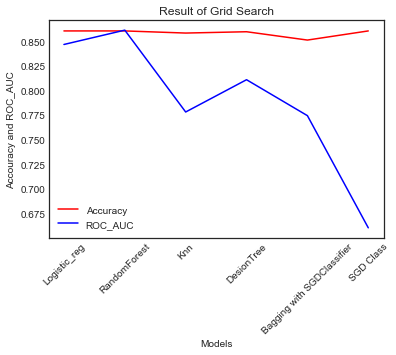

In [59]:
plt.plot(list(model_dict.values()), list(result_acc.values()), c='r')
plt.plot(list(model_dict.values()), list(result_auc.values()), c='b')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.ylabel('Accouracy and ROC_AUC')
plt.title('Result of Grid Search')
plt.legend(['Accuracy', 'ROC_AUC'])
plt.show()

In [47]:
""" Model performance during Grid Search """
pd.DataFrame(list(zip(model_dict.values(), result_acc.values(), result_auc.values())), \
                  columns=['Model', 'Accuracy_rate','Roc_auc_rate'])

,Model,Accuracy_rate,Roc_auc_rate
0,Logistic_reg,0.860413,0.846634
1,RandomForest,0.860413,0.861212
2,Knn,0.858250,0.777985
3,DesionTree,0.859587,0.810808
4,Bagging with SGDClassifier,0.851125,0.774270
5,SGD Class,0.860413,0.660232


100%|██████████| 39/39 [02:45<00:00,  4.24s/it]


'max oob 0.8604875 and number of estimators 30'

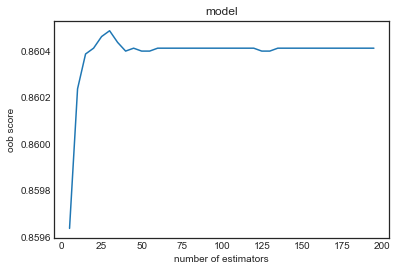

In [52]:
def graph(model, X_train, y_train):
    obb = []
    est = list(range(5, 200, 5))
    for i in tqdm(est):
        random_forest = model(n_estimators=i, criterion='entropy', random_state=11, oob_score=True, n_jobs=-1, \
                           max_depth=25, min_samples_leaf=80, min_samples_split=3,)
        random_forest.fit(X_train, y_train)
        obb.append(random_forest.oob_score_)
    display('max oob {} and number of estimators {}'.format(max(obb), est[np.argmax(obb)]))
    plt.plot(est, obb)
    plt.title('model')
    plt.xlabel('number of estimators')
    plt.ylabel('oob score')
    plt.show();
    
graph(RandomForestClassifier, X_train, y_train)

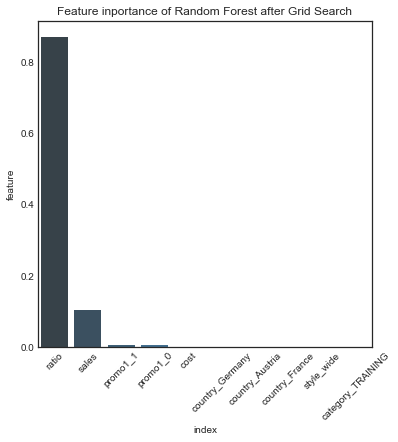

In [58]:
''' Build bar plot of feature importance of the best model '''

def build_feature_importance(model, X_train, y_train):
    
    models = RandomForestClassifier(criterion='entropy', random_state=11, oob_score=True, n_jobs=-1, \
                           max_depth=25, min_samples_leaf=80, min_samples_split=3, n_estimators=70)
    models.fit(X_train, y_train)
    data = pd.DataFrame(models.feature_importances_, X_train.columns, columns=["feature"])
    data = data.sort_values(by='feature', ascending=False).reset_index()
    plt.figure(figsize=[6,6])
    sns.barplot(x='index', y='feature', data=data[:10], palette="Blues_d")
    plt.title('Feature inportance of Random Forest after Grid Search')
    plt.xticks(rotation=45)
    plt.show();
    
build_feature_importance(RandomForestClassifier, X_train, y_train)
